In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt

import glob

import numpy as np
import pandas as pd
import seaborn as sns

from collections import OrderedDict

from access_biology_data import meta, relations, properties
from access_literature_data import medline
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export
from access_aging_data import earlier_studies, chaperome, companions, sequencing

In [5]:
from narrative import nar181026_heat_confidence_genes
from narrative import nar181205_networks

In [6]:
from scipy.stats import spearmanr

In [7]:
out_path = '191116_visualize_human_imbalance'

In [8]:
save_images = True

In [9]:
ref_genes = standardizer.reference_genes(9606, 'orp')

pr = properties.genbank_validated_rna(9606)[['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])

In [10]:
p = export.get_material_path('190428_chache_tstoeger_190427_gtex_with_tilt/stats_on_imbalance.xlsx')
tilt = pd.read_excel(p)

In [11]:
tilt.head()

,condition,tilt,pval,tilt_orp,pval_orp,gender,tissue,younger,older
0,females_Adipose_Subcutaneous_3_vs_2,0.210298,2.384289e-172,0.212675,1.699691e-175,female,Adipose - Subcutaneous,2,3
1,females_Adipose_Subcutaneous_4_vs_2,0.146914,2.880636e-84,0.147476,1.654229e-84,female,Adipose - Subcutaneous,2,4
2,females_Adipose_Subcutaneous_4_vs_3,-0.115481,1.456786e-52,-0.117334,5.719052e-54,female,Adipose - Subcutaneous,3,4
3,females_Adipose_Subcutaneous_5_vs_2,0.071833,2.592071e-21,0.072112,2.264565e-21,female,Adipose - Subcutaneous,2,5
4,females_Adipose_Subcutaneous_5_vs_3,-0.180310,6.988833e-127,-0.182700,1.148451e-129,female,Adipose - Subcutaneous,3,5


In [12]:
tilt = tilt.rename(columns={'tilt': 'rho'})

In [13]:
# tilt = master.copy()

In [14]:
p = export.get_material_path('190428_chache_tstoeger_190427_gtex_with_tilt/all_de.csv')
all_de = pd.read_csv(p).dropna(subset=['padj'])

In [15]:
all_de.loc[:, 'reduced_tissue'] = all_de['tissue'].str.replace(
    ' - ', '_').str.replace(' ', '_').str.replace(
    '-', '_').str.replace('(','').str.replace(')', '')

all_de.loc[:, 'condition'] = all_de.loc[:, 'gender'] + 's_' + all_de['reduced_tissue'] + '_' + \
    all_de['older'].astype(int).astype(str) + '_vs_' + all_de['younger'].astype(int).astype(str)

In [16]:
tilt.sort_values('rho', ascending=True)

,condition,rho,pval,tilt_orp,pval_orp,gender,tissue,younger,older
161,females_Brain_Frontal_Cortex_BA9_5_vs_3,-0.401803,0.000000e+00,-0.403624,0.000000e+00,female,Brain - Frontal Cortex (BA9),3,5
163,females_Brain_Frontal_Cortex_BA9_6_vs_3,-0.374689,0.000000e+00,-0.376297,0.000000e+00,female,Brain - Frontal Cortex (BA9),3,6
757,males_Brain_Nucleus_accumbens_basal_ganglia_7_...,-0.364078,0.000000e+00,-0.364790,0.000000e+00,male,Brain - Nucleus accumbens (basal ganglia),5,7
756,males_Brain_Nucleus_accumbens_basal_ganglia_7_...,-0.361873,0.000000e+00,-0.362477,0.000000e+00,male,Brain - Nucleus accumbens (basal ganglia),4,7
162,females_Brain_Frontal_Cortex_BA9_5_vs_4,-0.357576,0.000000e+00,-0.359229,0.000000e+00,female,Brain - Frontal Cortex (BA9),4,5
767,males_Brain_Putamen_basal_ganglia_7_vs_5,-0.353393,0.000000e+00,-0.353666,0.000000e+00,male,Brain - Putamen (basal ganglia),5,7
174,females_Brain_Hippocampus_7_vs_5,-0.351326,0.000000e+00,-0.352852,0.000000e+00,female,Brain - Hippocampus,5,7
755,males_Brain_Nucleus_accumbens_basal_ganglia_7_...,-0.332804,0.000000e+00,-0.333168,0.000000e+00,male,Brain - Nucleus accumbens (basal ganglia),2,7
758,males_Brain_Nucleus_accumbens_basal_ganglia_7_...,-0.331813,0.000000e+00,-0.332393,0.000000e+00,male,Brain - Nucleus accumbens (basal ganglia),6,7
119,females_Brain_Cerebellar_Hemisphere_5_vs_3,-0.327736,0.000000e+00,-0.328346,0.000000e+00,female,Brain - Cerebellar Hemisphere,3,5


In [17]:
from natsort import natsorted

In [18]:
conditions = natsorted(all_de['condition'].unique())

In [19]:
condition = 'males_Brain_Frontal_Cortex_BA9_7_vs_2'  # 'males_Brain_Cerebellar_Hemisphere_5_vs_2' # 'males_Heart_Left_Ventricle_6_vs_4' #

In [20]:
all_de.head()

,gene_ncbi,o_over_y,pvalue,padj,tissue,younger,older,gender,reduced_tissue,condition
0,5266,-0.507525,0.204765,0.492253,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
1,2070,1.157510,0.000066,0.012469,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
2,1149,-0.213831,0.579361,0.804020,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
4,4327,-0.051246,0.859720,0.949977,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
5,9136,-0.442423,0.017723,0.147885,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2


In [21]:
d = all_de[
    (all_de['condition']==condition) & 
    (all_de['gene_ncbi'].isin(ref_genes))
].rename(columns={'log2FoldChange': 'o_over_y'})

In [22]:
e = pd.merge(d[['gene_ncbi', 'o_over_y', 'padj']], pr[['gene_ncbi', 'log_length']])

In [23]:
e.loc[:, 'is_significant'] = e['padj'] < 0.05

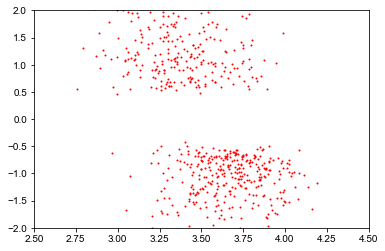

In [24]:

f = e['padj'] < 0.05
plt.scatter(
    e.loc[f, 'log_length'], e.loc[f, 'o_over_y'], c='red', s=1)

plt.ylim([-2, 2])
plt.xlim([2.5, 4.5])

if save_images:
    export.export_image(
        '{}/sole_scatter.pdf'.format(out_path))




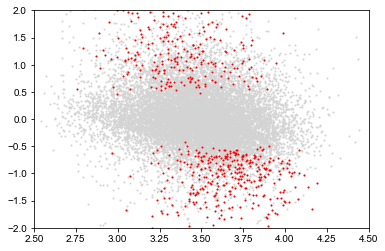

In [25]:
plt.scatter(
    e.loc[:, 'log_length'], e.loc[:, 'o_over_y'], c='lightgrey', s=1)


f = e['padj'] < 0.05
plt.scatter(
    e.loc[f, 'log_length'], e.loc[f, 'o_over_y'], c='red', s=1)

plt.ylim([-2, 2])
plt.xlim([2.5, 4.5])

if save_images:
    export.export_image(
        '{}/light_scatter.pdf'.format(out_path))



In [26]:
e.corr('spearman')

,gene_ncbi,o_over_y,padj,log_length,is_significant
gene_ncbi,1.000000,-0.005613,0.029250,-0.009766,0.008967
o_over_y,-0.005613,1.000000,0.016972,-0.198508,-0.047847
padj,0.029250,0.016972,1.000000,-0.069456,-0.348718
log_length,-0.009766,-0.198508,-0.069456,1.000000,0.045074
is_significant,0.008967,-0.047847,-0.348718,0.045074,1.000000


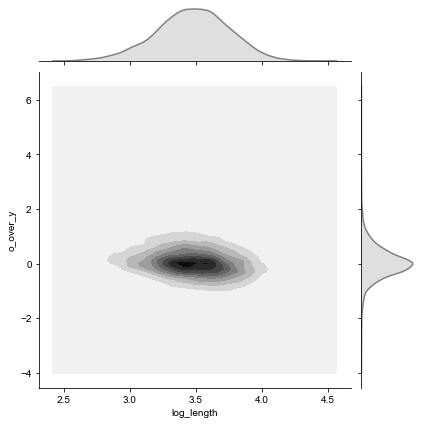

In [27]:
sns.jointplot(x='log_length', y='o_over_y', data=e, kind='kde',color='grey')

if save_images:
    export.export_image(
        '{}/grey.pdf'.format(out_path))



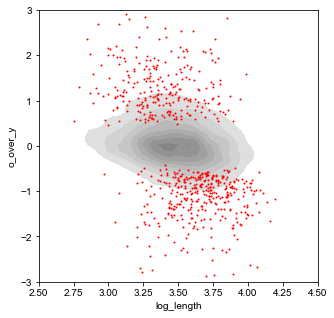

In [28]:
plt.figure(figsize=(5, 5))

sns.kdeplot(
    e.loc[:, 'log_length'], e.loc[:, 'o_over_y'], color='gray',shade=True, shade_lowest=False)


f = e['padj'] < 0.05
plt.scatter(
    e.loc[f, 'log_length'], e.loc[f, 'o_over_y'], c='red', s=1)

plt.ylim([-3, 3])
plt.xlim([2.5, 4.5])

if save_images:
    export.export_image(
        '{}/hybrid_scatter.pdf'.format(out_path))





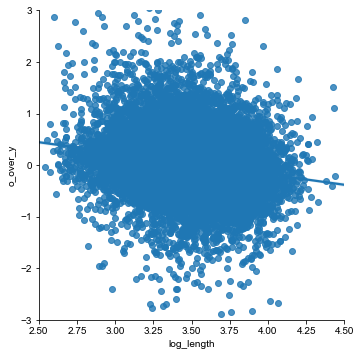

In [29]:
sns.lmplot(
    x ='log_length',
    y='o_over_y',
    data=e

)


plt.ylim([-3, 3])
plt.xlim([2.5, 4.5])


if save_images:
    export.export_image(
        '{}/regression.pdf'.format(out_path))




In [30]:
tilt[tilt['condition']==condition]

,condition,rho,pval,tilt_orp,pval_orp,gender,tissue,younger,older
719,males_Brain_Frontal_Cortex_BA9_7_vs_2,-0.18821,5.386534e-136,-0.187658,1.328047e-134,male,Brain - Frontal Cortex (BA9),2,7


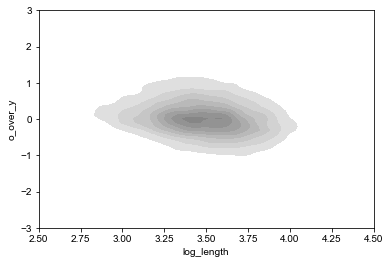

In [31]:
sns.kdeplot(
    e.loc[:, 'log_length'], e.loc[:, 'o_over_y'], color='gray',shade=True, shade_lowest=False)

plt.ylim([-3, 3])
plt.xlim([2.5, 4.5])



if save_images:
    export.export_image(
        '{}/simple_kde.pdf'.format(out_path))




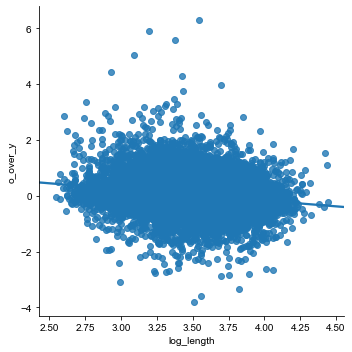

In [32]:
sns.lmplot(
    x ='log_length',
    y='o_over_y',
    data=e

)